In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import obspy
from obspy.core import read
import ipywidgets as widgets
from IPython.display import display

In [30]:
## parsing to Json or just any input file 
def parse_input_file(filename):
    request = {}
    for t in ['EQS','EQP','SUS','SUP','THS','THP','SNS','SNP','PXS','PXP']:
        request[t] = []
    with open(filename, 'r') as infile:
        for line in infile: 
            pick = {}
            pick_line = line.split(',')
            pick['event_type'] = pick_line[0].replace('[','').replace("'",'').strip()
            pick['time'] = pick_line[1].replace("'",'').strip()
            pick['sta'] = pick_line[2].replace("'",'').strip()
            pick['net'] = pick_line[3].replace("'",'').strip()
            pick['loc'] = pick_line[4].replace("'",'').strip()
            pick['chan'] = pick_line[5].replace("'",'').strip()
            pick['pick_type'] = pick_line[6].replace("'",'').strip()
            pick['quality'] = pick_line[7].replace("'",'').strip()
            pick['who'] = pick_line[8].replace(']','').replace("'",'').strip()
            #print(pick) 
            key = "{}{}".format(pick['event_type'], pick['pick_type'])
            #print(key)
            request[key].append(pick)
    return request
test = parse_input_file('../Labeled_arrivals_from_database.txt')

In [31]:
## maybe we don't need json
import json
with open('test.txt', 'w') as outfile:
    json.dump(test, outfile)


In [32]:
test.keys()  


dict_keys(['EQS', 'EQP', 'SUS', 'SUP', 'THS', 'THP', 'SNS', 'SNP', 'PXS', 'PXP'])

In [33]:
test['EQS'][0]

{'event_type': 'EQ',
 'time': '1331773450.19634',
 'sta': 'KSXB',
 'net': 'NC',
 'loc': '',
 'chan': 'HHE',
 'pick_type': 'S',
 'quality': 'e',
 'who': 'H'}

In [34]:
len(test['EQS'])

4361

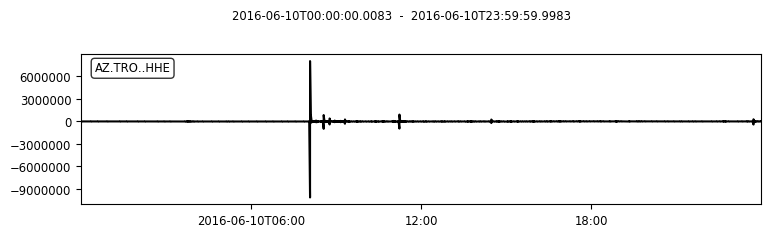

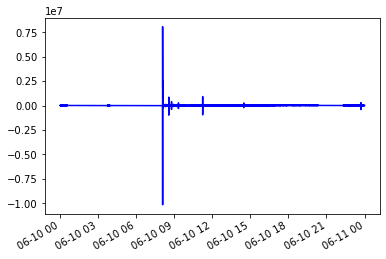

868029763.809


/srv/conda/envs/seismic-wiggles-env/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/srv/conda/envs/seismic-wiggles-env/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


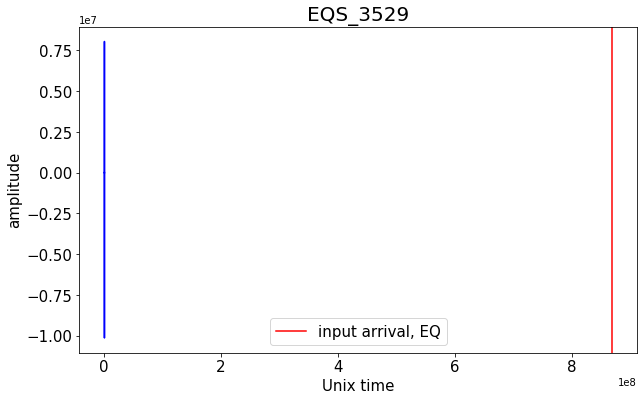

In [35]:
# retrieve test wiggle
wiggle = read('../20160610000000.AZ.TRO.HHE.mseed')
wiggle.plot()

# plot test using matplotplib
wiggle = wiggle[0]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(wiggle.times("matplotlib"), wiggle.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

# add model data
%matplotlib inline

#randomly choose a wiggle in EQS
ID = np.random.choice(len(test['EQS']))
fig, ax = plt.subplots(figsize = (10,6))

k = np.random.normal(float(test['EQS'][ID]['time']), 3, 1000)

fig = plt.plot(wiggle.times("matplotlib"), wiggle.data, "b-")
fig = plt.axvline(x=float(test['EQS'][ID]['time']),color = 'red', 
                  label = 'input arrival, {}'.format(test['EQS'][0]['event_type']))
x=float(test['EQS'][ID]['time'])
print(x)

ax.set_title('EQS_{}'.format(ID),fontsize = 20)
ax.set_ylabel('amplitude', fontsize=15)
ax.set_xlabel('Unix time', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
    

900243055.093


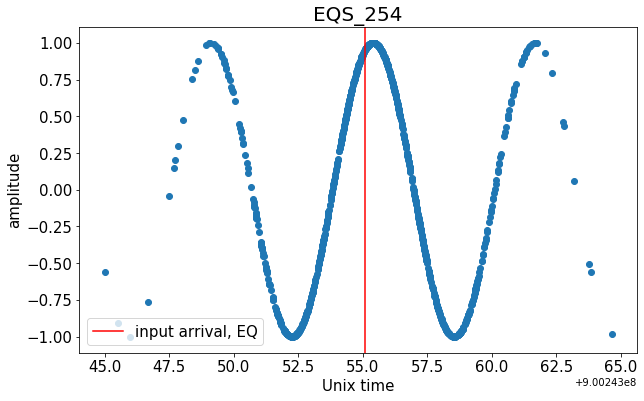

In [54]:
#add some wiggles
%matplotlib inline

#randomly choose a wiggle in EQS
ID = np.random.choice(len(test['EQS']))

fig, ax = plt.subplots(figsize = (10,6))

k = np.random.normal(float(test['EQS'][ID]['time']), 3, 1000)
fig = plt.scatter(k, np.sin(k))
fig = plt.axvline(x=float(test['EQS'][ID]['time']),color = 'red', 
                  label = 'input arrival, {}'.format(test['EQS'][0]['event_type']))
x=float(test['EQS'][ID]['time'])
print(x)

ax.set_title('EQS_{}'.format(ID),fontsize = 20)
ax.set_ylabel('amplitude', fontsize=15)
ax.set_xlabel('Unix time', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# add widgets
yes_button = widgets.Button(description='Yes')
#no_button = widgets.Button(description='No')
out = widgets.Output()

def on_button_clicked(response):
      with out:
          print(response)
        # write to file 

yes_button.on_click(on_button_clicked('t'))
no_button.on_click(on_button_clicked('f'))

# displaying button and its output together
widgets.VBox([yes_button,out])
#widgets.VBox([no_button,out])
